In [29]:
from pylab import *
from scipy import signal
import numpy as np
import scipy.fftpack as fourier
from scipy.signal import butter, filtfilt, lfilter

In [30]:
data = loadtxt("prueba_1000Hz.txt")

In [31]:
fs = 1000

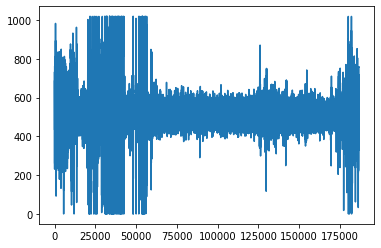

In [68]:
plot(data[:, 5])

In [118]:
x = data[:, 5]

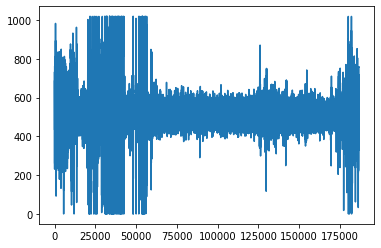

In [70]:
plot(x)

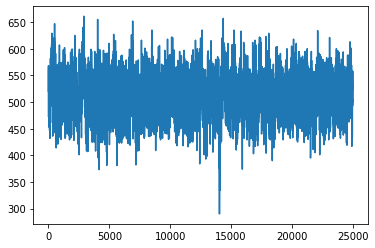

In [72]:
plot(x[75000:100000])

In [92]:
def highpass(s, cutoff, order = 5, fs = 1000.0):
    b, a = signal.butter(order, cutoff / (fs/2), btype='high', analog=False)
    return filtfilt(b, a, s)


In [119]:
xpa = highpass(x, 1)


Señal en frecuencia


In [94]:
N = 1024
xv1 = xpa[0:N]
dt = (1/fs)

In [95]:
XV1 = fourier.fft(xv1)
XV1 = fourier.fftshift(XV1)
freqs = fourier.fftfreq(N, dt)
freqs = fourier.fftshift(freqs)
freqs


array([-500.       , -499.0234375, -498.046875 , ...,  497.0703125,
        498.046875 ,  499.0234375])

In [96]:
XV1Ab=(1/N)*np.abs(XV1)

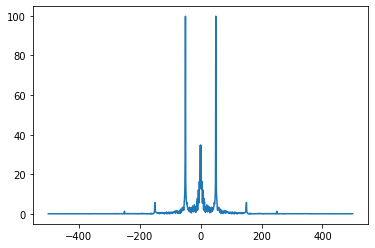

In [97]:
plot(freqs, XV1Ab)

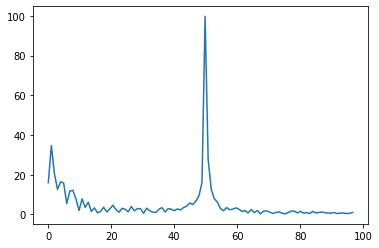

In [98]:
plot(freqs[N//2: (N//2+100)], XV1Ab[N//2:(N//2+100)])

In [99]:
def lowpass(s, f, order=10, fs=1000.0):
    b, a = signal.butter(order, f / (fs/2))
    return signal.lfilter(b, a, s)

In [120]:
xpb = lowpass(xpa, 50)

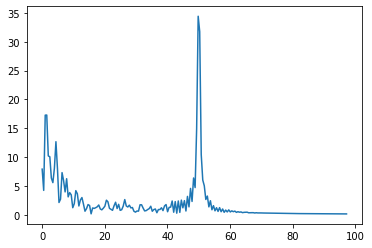

In [101]:
N = 2048
XPB = fourier.fft(xpb[0:1024], N)
XPB = fourier.fftshift(XPB)
freqs = fourier.fftfreq(N, dt)
freqs = fourier.fftshift(freqs)
XPBAb=(1/N)*np.abs(XPB)
plot(freqs[N//2:N//2+200], XPBAb[N//2:N//2+200])

In [102]:
def notchfilter(s, f, Q = 12, fs = 1000):
    b, a = signal.iirnotch(f / (fs/2), Q)
    return lfilter(b, a, s)

In [121]:
xf = notchfilter(xpb, 50)

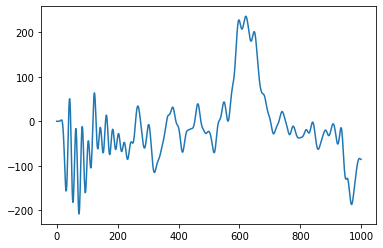

In [104]:
plot(xf[0:1000])

In [105]:
xf = xf[0:4096]
N = 4096
XF = fourier.fft(xf, N)
XF = fourier.fftshift(XF)
freqs = fourier.fftfreq(N, dt)
freqs = fourier.fftshift(freqs)

In [106]:
XFAb=(1/N)*np.abs(XF)

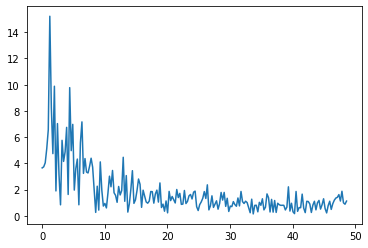

In [107]:
plot(freqs[N//2:N//2+200], XFAb[N//2:N//2+200])

In [108]:
win = 2*fs
freqs, psd = signal.welch(xf, fs, nperseg=win)

In [126]:
shape(xf)

(186600,)

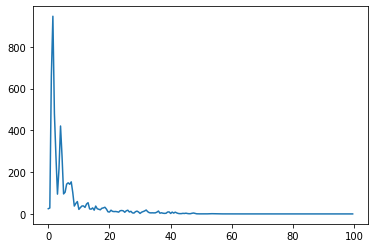

In [109]:
plot (freqs[0:200], psd[0:200])

In [110]:
PSD = 10*log10(psd/max(psd))

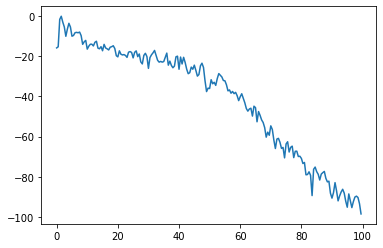

In [111]:
plot(freqs[0:200], PSD[0:200])

In [112]:
PSD


array([ -15.79233361,  -15.2196789 ,   -1.5696183 , ..., -204.80372299,
       -204.81808576, -207.83318709])

Calcular stft

In [122]:
 f, t, Zxx = signal.stft(xf, fs, nperseg=1000)

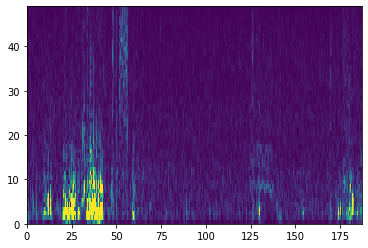

In [123]:
pcolormesh(t, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)

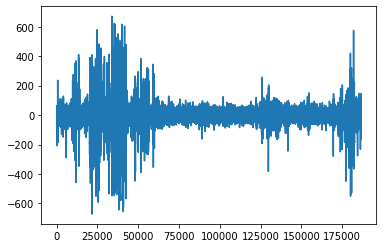

In [124]:
plot(xf)

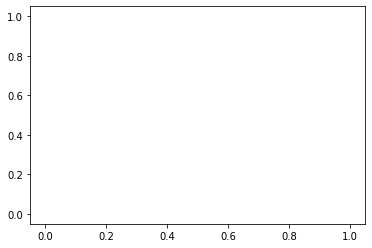

In [116]:
plot(xf[180000:186600])

In [117]:
shape(xf)

(4096,)